In [1]:
import io
import tifffile
import quilt3 as q3
import matplotlib.pyplot as plt
import tensorflow as tf
import collections
import numpy as np
from tqdm import tqdm
from aicsimageio import AICSImage #=> this package was really difficult to install, maybe using an automated yaml would be good
from PIL import Image
import os
from urllib.parse import urlparse, unquote

In [2]:
#list(q3.list_packages("s3://allencell"))

In [3]:
pipeline = q3.Package.browse(
    "aics/pipeline_integrated_single_cell",
    registry="s3://allencell"
)

Loading manifest: 100%|███████████████████| 179067/179067 [00:03<00:00, 58.0k/s]


In [4]:
#for file_name in pipeline["cell_images_2d"]:
    #print(file_name)

In [5]:
num_files = len(pipeline["cell_images_2d"])
num_files

49325

In [20]:
for ind, file_name in enumerate(pipeline["cell_images_2d"]):
    if (ind == 1):
        entry = pipeline["cell_images_2d"][file_name].fetch(f"./AllenCell/{file_name}")
        uri_file_path = entry.get()
        file_path = unquote(urlparse(uri_file_path).path) # => this is stupid because you literally define the path in the line above 
        #img = AICSImage(f"./AllenCell/{file_name}") => this works but relies on direct pathing :(
        # maybe it would be good to manage a dict btween index number and the filename / file_path
        img = AICSImage(file_path)

100%|██████████████████████████████████████| 11.9k/11.9k [00:02<00:00, 5.34kB/s]


In [21]:
print(file_path)

/Users/bumjin/Documents/Brown Notes/Singh Lab/SlotAttention/AllenCell/000804bd_14756_115283_reg_flat.png


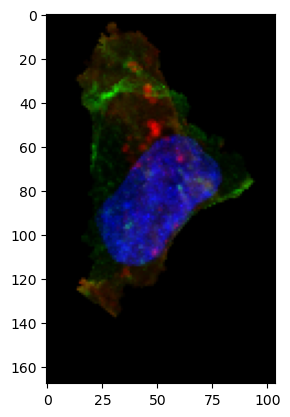

In [22]:
plt.imshow(img.data[0][0][0])

In [19]:
tf.convert_to_tensor(img.data[0][0][0])

<tf.Tensor: shape=(168, 104, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>